# Challenge Análise base de dados

A base de dados contém um conjunto de características sobre colaboradores de uma empresa, tais como nível de satisfação do colaborador com a empresa, média de horas mensais trabalhadas, tempo de empresa, acidente de trabalho, departamento, salário e entre outros atributos. Você, como um(a) cientista de dados, tem o desafio de seguir os seguintes passos abaixo para construir um modelo preditivo.


# Análise inicial da base de dados

Vamos verificar os dados, se há dados nulos ou inválidos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
original_df = pd.read_csv('HR_Abandono.csv', sep=';')

Vamos analisar o shape dos dados para verificar a quantidade de linhas e colunas

Tivemos que ajustar o separator para ter a quantidade de colunas corretas

In [3]:
original_df.shape

(14999, 11)

In [4]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     14999 non-null  int64 
 1   satisfaction_level     14999 non-null  object
 2   last_evaluation        14999 non-null  object
 3   average_montly_hours   14999 non-null  int64 
 4   time_spend_company     14999 non-null  int64 
 5   Work_accident          14999 non-null  int64 
 6   left                   14999 non-null  int64 
 7   promotion_last_5years  14999 non-null  int64 
 8   salary                 14999 non-null  object
 9   num_project            14999 non-null  int64 
 10  depto                  14999 non-null  object
dtypes: int64(7), object(4)
memory usage: 1.3+ MB


In [5]:
original_df.head()

id satisfaction_level last_evaluation  average_montly_hours  \
0   1               0,38            0,53                   157   
1   2                0,8            0,86                   262   
2   3               0,11            0,88                   272   
3   4               0,72            0,87                   223   
4   5               0,37            0,52                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  salary  \
0                   3              0     1                      0     low   
1                   6              0     1                      0  medium   
2                   4              0     1                      0  medium   
3                   5              0     1                      0     low   
4                   3              0     1                      0     low   

   num_project  depto  
0            2  sales  
1            5  sales  
2            6  sales  
3            5  sales  
4            2  sales

Podemos ver um ponto estranho nesses dados. Temos dois dados numéricos (satisfaction_level e last_evaluation) que estão classificados como objeto. Isso demonstra algum erro de parsing.

In [6]:
set(original_df['salary'])

{'high', 'low', 'medium'}

Um ponto interessante que consiguimos ver aqui, é que o salário não é um dado numérico, ou seja, nao temos o valor exato, mas sim uma classificação quantitativa.

Como por exemplo, low, medium e high

Vamos analisar agora os valores em departamento

Temos valores relacionados a departamentos de uma empresa

In [7]:
set(original_df['depto'])

{'IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical'}

# Analisando dados nulos

In [8]:
original_df.isnull().sum()

id                       0
satisfaction_level       0
last_evaluation          0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
salary                   0
num_project              0
depto                    0
dtype: int64

Vemos que não temos dados nulos. Porém vamos analisar os tipos daquelas colunas que não estão compatíveis.

In [9]:
# Fazendo o regex para substituir o ',' pelo '.'

original_df['satisfaction_level'] = original_df['satisfaction_level'].replace(regex=',', value='.')
original_df['satisfaction_level'] = original_df['satisfaction_level'].astype(float)

In [10]:
# verificando o replace com o tipo

original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  object 
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   num_project            14999 non-null  int64  
 10  depto                  14999 non-null  object 
dtypes: float64(1), int64(7), object(3)
memory usage: 1.3+ MB


In [11]:
# Fazendo o regex para substituir o ',' pelo '.'

original_df['last_evaluation'] = original_df['last_evaluation'].replace(regex=',', value='.')
original_df['last_evaluation'] = original_df['last_evaluation'].astype(float)

In [12]:
# verificando o replace com o tipo

original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   num_project            14999 non-null  int64  
 10  depto                  14999 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


# Estudando as colunas

In [13]:
#removendo o ID que sabemos que não faze sentido

original_df = original_df.drop(columns='id')
original_df.describe()

satisfaction_level  last_evaluation  average_montly_hours  \
count        14999.000000     14999.000000          14999.000000   
mean             0.612823         0.716102            201.083672   
std              0.248655         0.171169             50.182121   
min              0.010000         0.360000             96.000000   
25%              0.440000         0.560000            156.000000   
50%              0.640000         0.720000            200.000000   
75%              0.820000         0.870000            245.000000   
max              1.000000         1.000000            810.000000   

       time_spend_company  Work_accident          left  promotion_last_5years  \
count        14999.000000   14999.000000  14999.000000           14999.000000   
mean             3.407027       0.144610      0.238083               0.021268   
std              1.176120       0.351719      0.425924               0.144281   
min              2.000000       0.000000      0.000000               0.000000   
25%              3.000000       0.000000      0.000000               0.000000   
50%              3.000000       0.000000      0.000000               0.000000   
75%              4.000000       0.000000      0.000000               0.000000   
max              6.000000       1.000000      1.000000               1.000000   

        num_project  
count  14999.000000  
mean       3.785986  
std        1.194539  
min        2.000000  
25%        3.000000  
50%        4.000000  
75%        5.000000  
max        6.000000

## satisfaction_level

Podemos ver que nosso desvio padrão, não é considerado muito alto, tendo os valores próximos a média.

Vemos que a média e nossa mediana também não tem uma variação muito grande de valores, indicando que não temos um grande incidencia de outliers.

E vemos que não há outliers pelo gráfico de boxplot. E pelo gráfico percebemos que os valores se concentram na faixa de 0.4 até 0.8

Essa coluna indica o valor de satisfação das pessoas, em uma escala 0 até 1


<Axes: ylabel='satisfaction_level'>

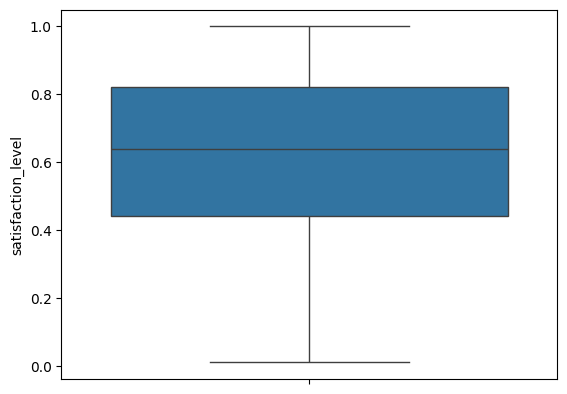

In [14]:
# satisfaction_level

sns.boxplot(original_df['satisfaction_level'])

## last_evaluation

Podemos ver pela tabela que provavelmente não contamos com outliers, devido a média e a mediana se encontrarem próximas.

Temos um desvio padrão baixo, indicando que os valores se concentram próximo da média aritimética

Vemos pelo gráfico de boxplot que não contamos com outliers no gráfico.

Aparenta ser o valor da ultima avaliação da pessoa na empresa

<Axes: ylabel='last_evaluation'>

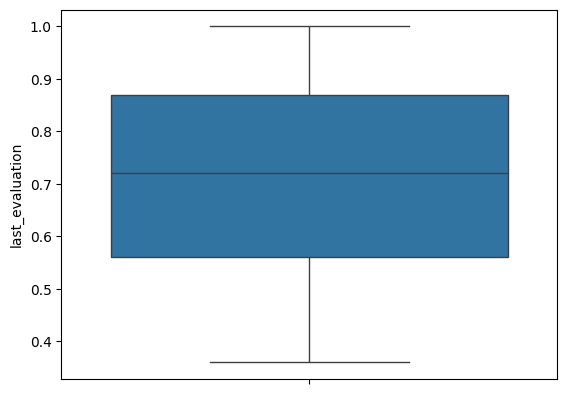

In [15]:
# last_evaluation

sns.boxplot(original_df['last_evaluation'])

## average_montly_hours

Aparenta ser o campo referetne a média de horas trabalhadas por mês. Aqui vemos um dado interessante, onde indica que apesar do desvio padrão se pequeno e da mediana estarem bem próximos da média, temos um valor de outlier indicado pelo gráfico de boxplot

Fazendo as contas, dizemos que essa pessoa teve 810 horas trabalhadas em média no mes, algo por volta de 38h por dia, algo bem acima da média, que seria de 200h por mes, e mto acima do 3 quartil (75%).

Isso pode indicar algum erro do dado, devido a alta discrepancia, ou podemos estar tratando de um funcionário com dados muito acima da média

<Axes: ylabel='average_montly_hours'>

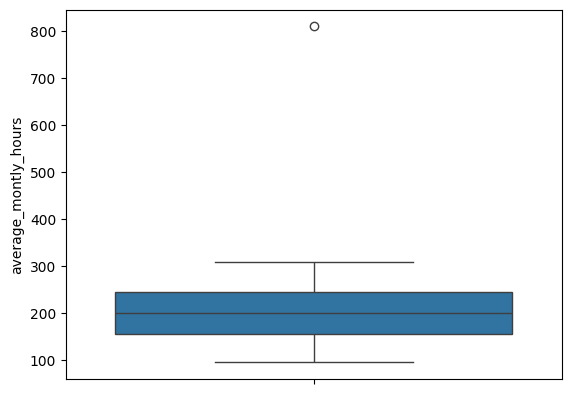

In [16]:
# average_montly_hours

sns.boxplot(original_df['average_montly_hours'])

In [17]:
original_df[original_df['average_montly_hours'] >= 810].__len__()

1

## time_spend_company

Aparenta ser o tempo de cada funcionario na companhia. Vemos que nesse caso, pelo boxplot e pela nossa diferença de média/mediana, conseguimos identificar que temos outliers na base

Foi visto que 1282 dados são outliers, e os valores comuns da base ficam entre 3 a 4.

Pela quantidade de registros, pode não ser um erro, mas sim de funcionários que estão na empresa desde a sua fundação já que todos tem a mesmo valor, e podem represetnar até os cargos mais altos da companhia.

Aparentemente a unidade que está sendo utilizada na representação é anos



<Axes: ylabel='time_spend_company'>

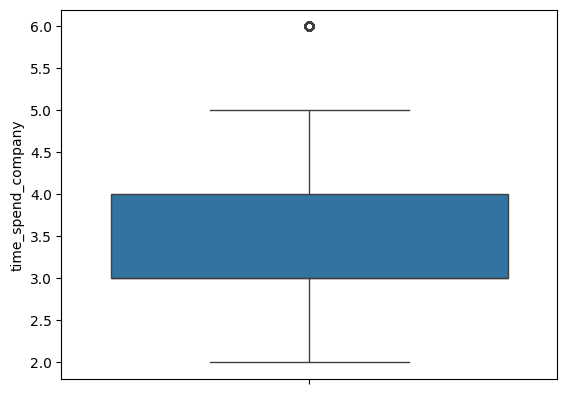

In [18]:
# time_spend_company

sns.boxplot(original_df['time_spend_company'])

In [19]:
original_df[original_df['time_spend_company'] >= 6].__len__()

1282

## Work_accident

ANalisando os dados, vemos que essa coluna é composta de valores binários, representando a ausencia ou a presença de acidentes de trabalho.

Conseguimos ver essa questão do campo ser binário pelos quatis serem zero

<Axes: ylabel='Work_accident'>

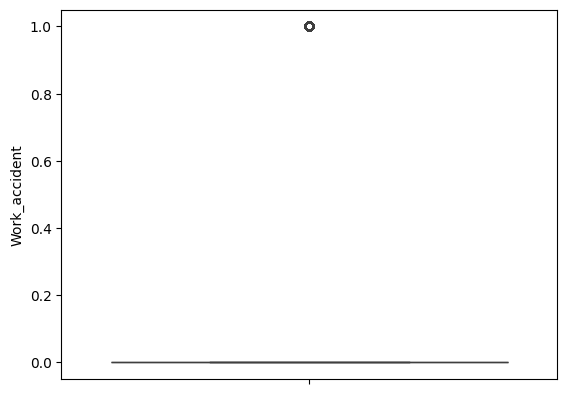

In [20]:
# Work_accident

sns.boxplot(original_df['Work_accident'])

In [21]:
set(original_df['Work_accident'])

{0, 1}

## left

É um campo binário, assim como o de cima. Conseguimos ver isso utilizando o método set para exibir os valores presentes na coluna

Aparentemente diz se aquele funcionário saiu ou não da empresa.

<Axes: ylabel='left'>

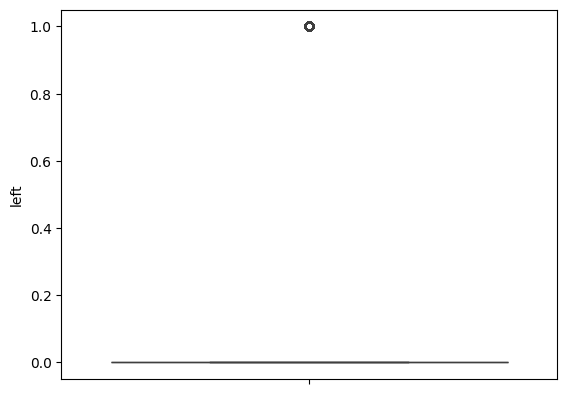

In [22]:
# left

sns.boxplot(original_df['left'])

In [23]:
set(original_df['left'])

{0, 1}

## promotion_last_5years

Conseguimos ver que como os outros acima é um valor binário.

Representa quem recebeu uma promoção nos ultimos 5 anos

<Axes: ylabel='promotion_last_5years'>

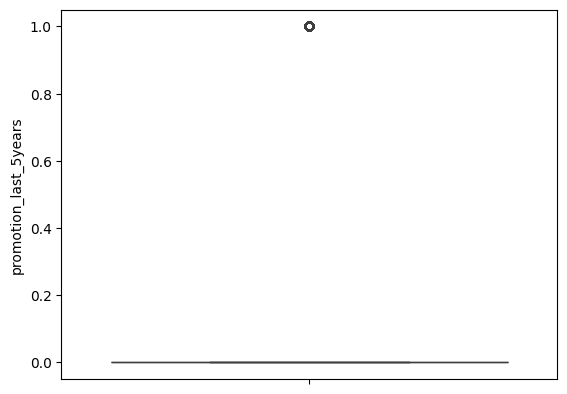

In [24]:
# promotion_last_5years

sns.boxplot(original_df['promotion_last_5years'])

In [25]:
set(original_df['promotion_last_5years'])

{0, 1}

## num_project

Coluna quantitativa, provavelmente representando quantos projetos os funcionários já trabalharam.

Temos valores que vão até 6, mas a grande parte se concentra entre 3 a 5 projetos.

Não temos outliers, então contamos com valores bem distribuidos da coluna, apesar do nosso 75% ser 5 e termos um valor de desvio padrão relevante

<Axes: ylabel='num_project'>

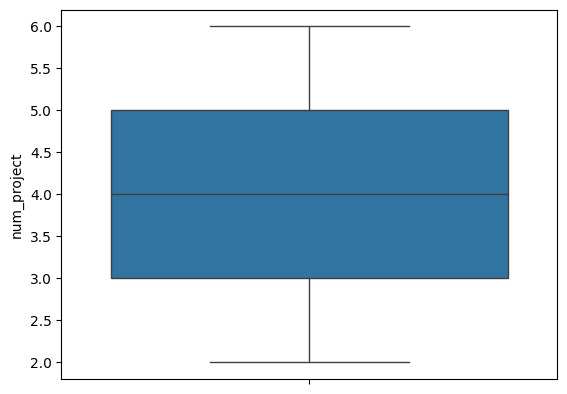

In [26]:
# num_project

sns.boxplot(original_df['num_project'])

## Análise mais profunda dos dados

Agora vamos entender melhor o que cada um dos dados representa e suas correlações e influencias

Vamos iniciar fazendo um histplot da base

array([[<Axes: title={'center': 'satisfaction_level'}>,
        <Axes: title={'center': 'last_evaluation'}>,
        <Axes: title={'center': 'average_montly_hours'}>],
       [<Axes: title={'center': 'time_spend_company'}>,
        <Axes: title={'center': 'Work_accident'}>,
        <Axes: title={'center': 'left'}>],
       [<Axes: title={'center': 'promotion_last_5years'}>,
        <Axes: title={'center': 'num_project'}>, <Axes: >]], dtype=object)

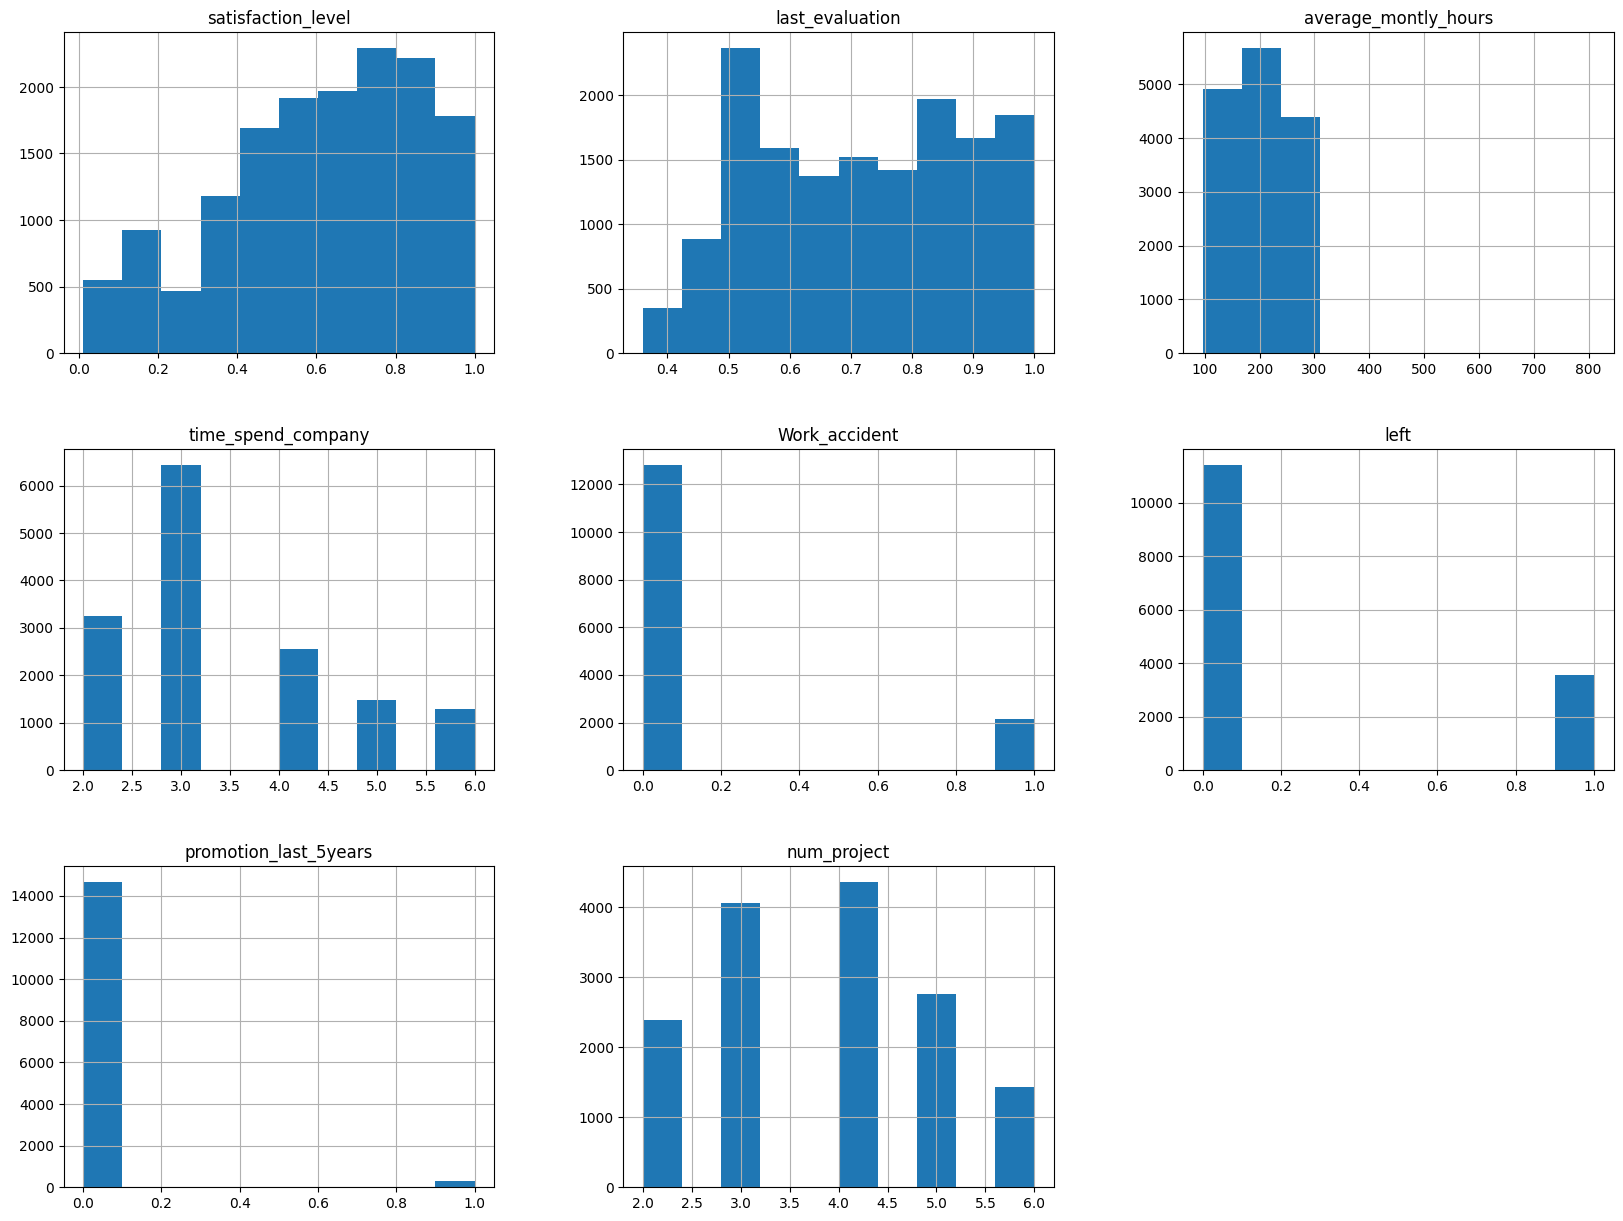

In [27]:
original_df.hist(figsize=(20,15))

Vamos analisar melhor o gráfico de satisfação

<Axes: xlabel='satisfaction_level', ylabel='Count'>

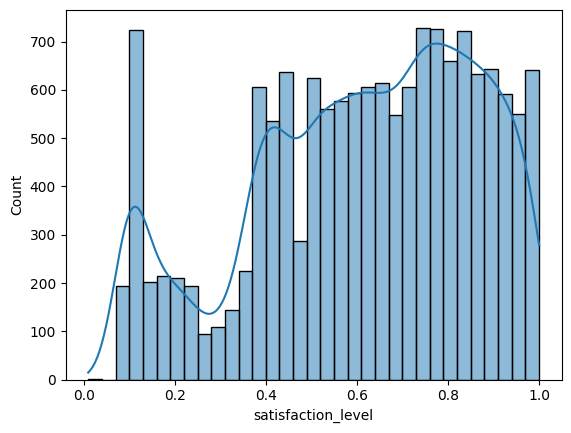

In [28]:
sns.histplot(original_df['satisfaction_level'], kde=True)

Conseguimos ver de forma mais detalhada que temos um grau de instatisfação relevante.

Será que temos mais pessoas insatisfeitas do que pessoas com grau de satisfação mediano/alto?

In [29]:
# filtrar os dados com satisfação baixa (até 0.4)

low_satisfaction = original_df[original_df['satisfaction_level'] < 0.5].count()

# filtrar os dados com satisfação mediano

medium_satisfaction = original_df[(original_df['satisfaction_level'] >= 0.5) & (original_df['satisfaction_level'] <= 0.7)].count()

# filtrar os dados com satisfação alta

high_satisfaction = original_df[original_df.satisfaction_level > 0.7].count()

print(medium_satisfaction)

count_result = {
    'low Satisfaction (<0.4)': low_satisfaction,
    'medium Satisfaction (>0.4 e <0.7)': medium_satisfaction,
    'high Satisfaction (>0.7)': high_satisfaction
}

satisfaction_level       4118
last_evaluation          4118
average_montly_hours     4118
time_spend_company       4118
Work_accident            4118
left                     4118
promotion_last_5years    4118
salary                   4118
num_project              4118
depto                    4118
dtype: int64


<Axes: >

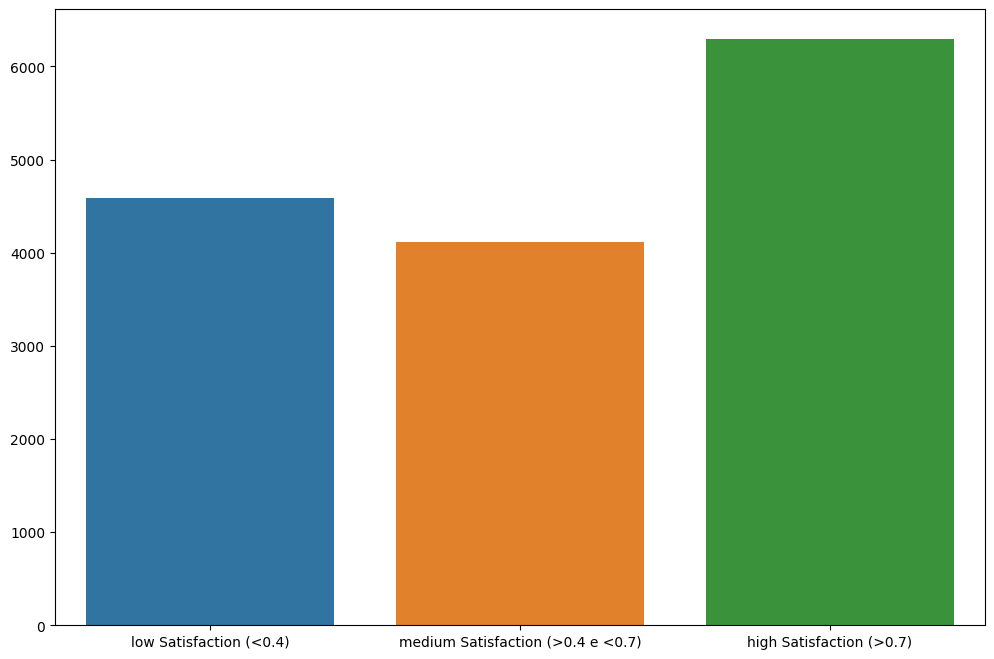

In [30]:
plt.figure(figsize=(12,8))
sns.barplot(count_result)

Conseguimos ver que temos uma maior quantidade de funcionarios com satisfação alta, do que média e baixa. E também vemos que grande parte ou está com uma satisfação mediana ou alta do que infeliz com a empresa.

Mas conseguimos observar também, que temos mais pessoas infelizes que na média

Como estão relacionado o nivel de satisfação com a ultima avalição e a promoção?

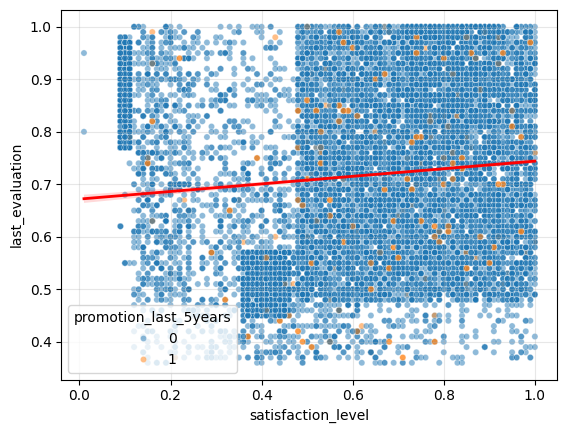

In [31]:
sns.scatterplot(original_df, x='satisfaction_level', y='last_evaluation', hue='promotion_last_5years', alpha=0.5, s=20)
sns.regplot(data=original_df, 
            x='satisfaction_level', 
            y='last_evaluation', 
            scatter=False, 
            color='red', 
            line_kws={'linewidth': 2})

plt.grid(True, alpha=0.3)

Conseguimos ver que a maior concentração de dados se encontra em avaliações de 5 para cima, e a maior parte desses dados que foram avaliados de 5 para cima tem um grau de satisfação médio/elevado

Conseguimos verificar também que a maior parte das pessoas que foram promovidas nps ultimos 5 anos estão na ultima avaliação acima do 5.

E também, vemos que acima do 0.4, temos mais promoções nos ultimos 5 anos do que abaixo.

Text(1, 0.95, 'Com acidente -> Média: 0.648')

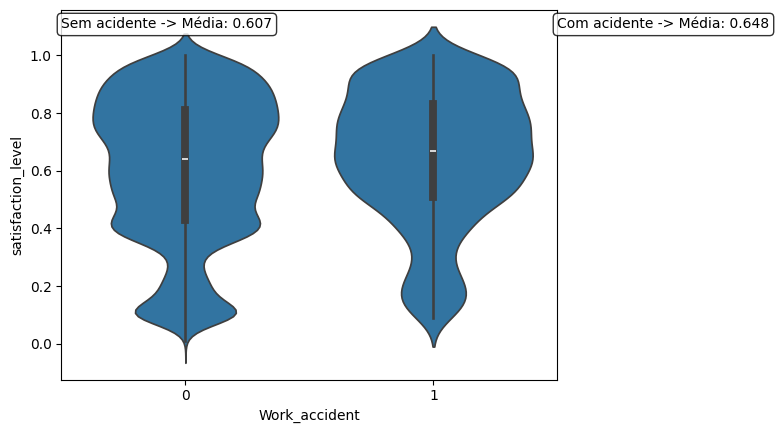

In [32]:
# Será que temos agluma relação da satisfação e se houve algum tipo de acidente de trabalho?

sns.violinplot(original_df, x='Work_accident', y='satisfaction_level')

no_accident = original_df[original_df['Work_accident'] == 0]['satisfaction_level']
has_accident = original_df[original_df['Work_accident'] == 1]['satisfaction_level']

plt.text(0, 0.95, f'Sem acidente -> Média: {no_accident.mean():.3f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
         fontsize=10)
plt.text(1, 0.95, f'Com acidente -> Média: {has_accident.mean():.3f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
         fontsize=10)

Vemos que não há uma relação negativa da incidencia de acidente com o nível de satisfação. Inclusive, considerando aqueles que sofreram acidente, temos uma média de satisfação maior.

Podemos assumir que os acidentes de trabalho não deve ser devido a más condições da empresa

Vamos analisar um pouco melhor o gráfico de média da horas trabalhadas por mes

<Axes: xlabel='average_montly_hours', ylabel='Count'>

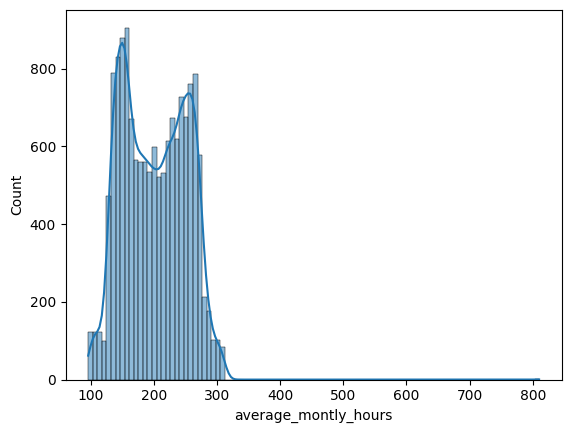

In [33]:
sns.histplot(original_df['average_montly_hours'], kde=True)

In [34]:
# Será que as pessoas que trabalham muito mais que as outras, tem um grau de satisfação baixo?

workaholics = original_df[original_df.average_montly_hours >= 800]


<Axes: xlabel='average_montly_hours', ylabel='satisfaction_level'>

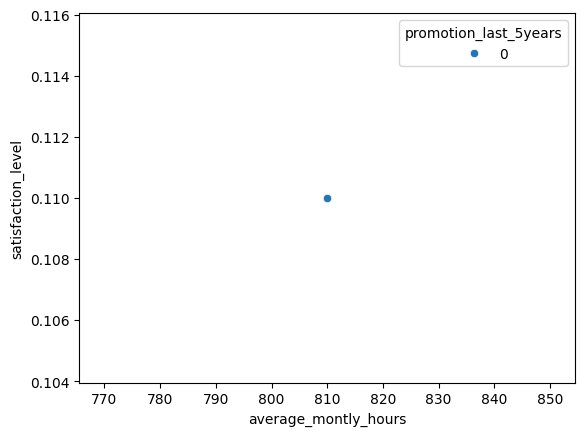

In [35]:
sns.scatterplot(workaholics, x='average_montly_hours', y='satisfaction_level', hue='promotion_last_5years')

Vemos que só temos uma pessoa que trabalha mais que as outras, e o nível de satisfação dela é baixo.

<Axes: xlabel='time_spend_company', ylabel='Count'>

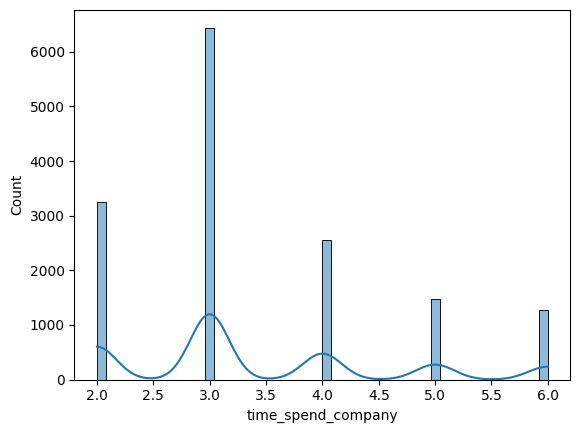

In [36]:
sns.histplot(original_df['time_spend_company'], kde=True)

Vemos que nsse gráfico há uma distribuição bem diferenciada, com vários picos, sendo os maiores em 3.

Isso demonstra que trabalhamos com valores inteiros, e que temos sua maior concetração no valor 3. Podendo indicar que o valor está em anos.

<Axes: xlabel='time_spend_company', ylabel='satisfaction_level'>

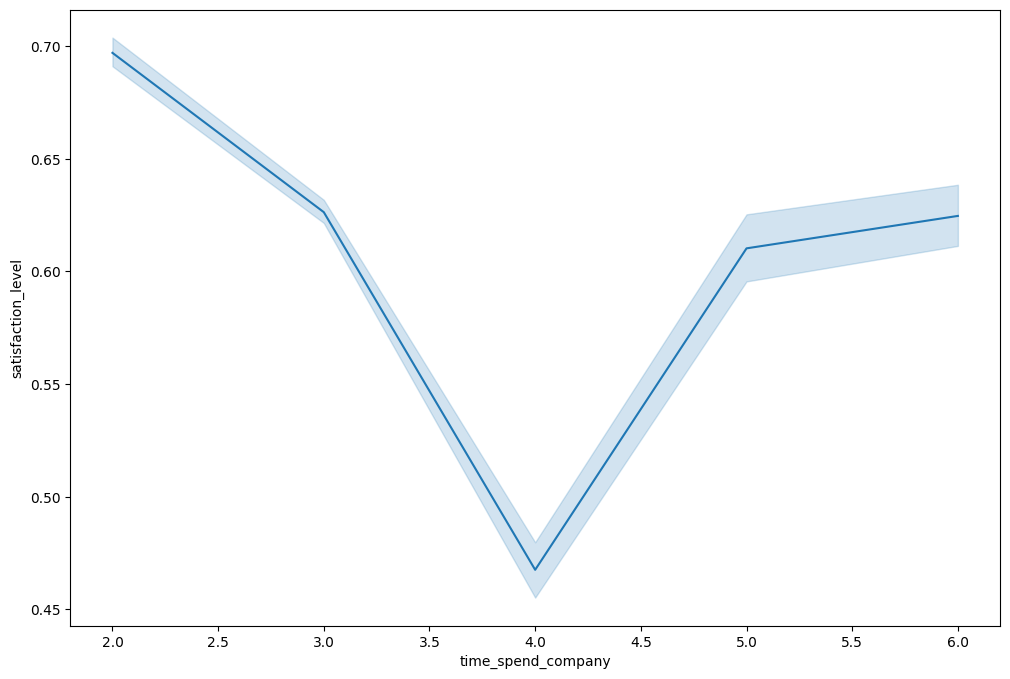

In [37]:
# qual é a relação do tempo de companhia com a satisfação dos funcionários?
plt.figure(figsize=(12, 8))

sns.lineplot(original_df, x='time_spend_company', y='satisfaction_level')

Aqui vemos que a tendencia é o empregado entrar com um nivel de satisfação alto, e até o 4 ano ter o seu menor nivel de satisfação. Quando chegamos após os 4 anos vemos que a tendencia é voltar a aumentar e ficar com uma satisfação acima da média a partir do 5 ano de empresa

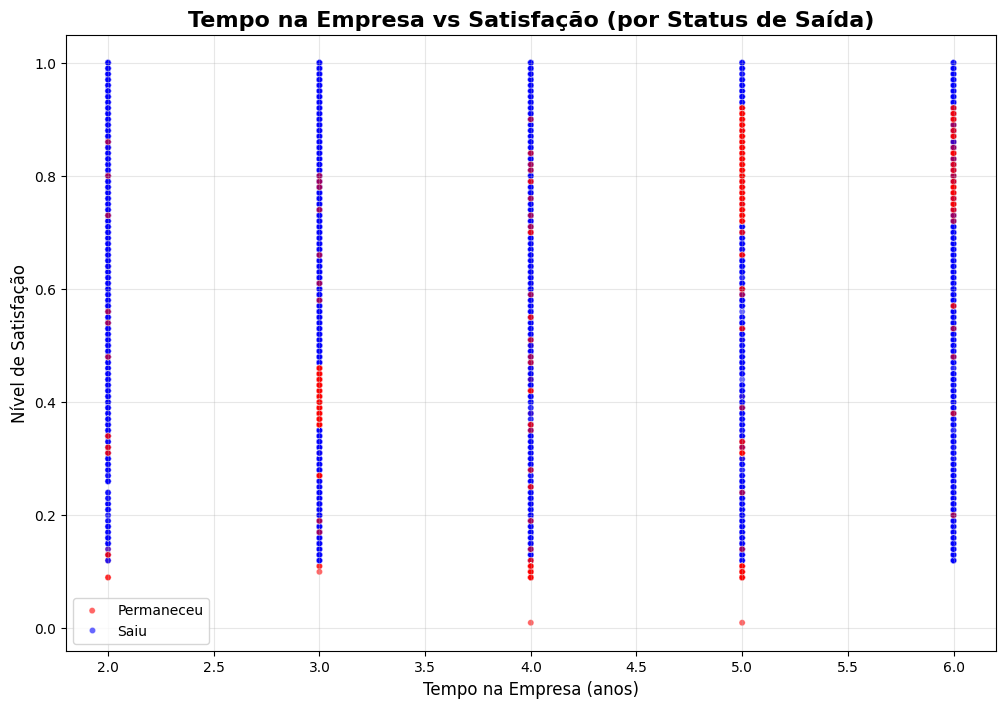

In [38]:
# Será que a maior parte dos funcionarios que deixaram a empresa, estão no 4 ano?
# Scatter plot com cores diferenciando quem saiu
plt.figure(figsize=(12, 8))

sns.scatterplot(data=original_df, 
                x='time_spend_company', 
                y='satisfaction_level', 
                hue='left',  # Cores diferentes para quem saiu
                palette=['blue', 'red'],  # Azul = ficou, Vermelho = saiu
                alpha=0.6, 
                s=20)

plt.title('Tempo na Empresa vs Satisfação (por Status de Saída)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Tempo na Empresa (anos)', fontsize=12)
plt.ylabel('Nível de Satisfação', fontsize=12)
plt.legend(['Permaneceu', 'Saiu'])
plt.grid(True, alpha=0.3)
plt.show()

/tmp/ipykernel_9698/2867016842.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=original_df,


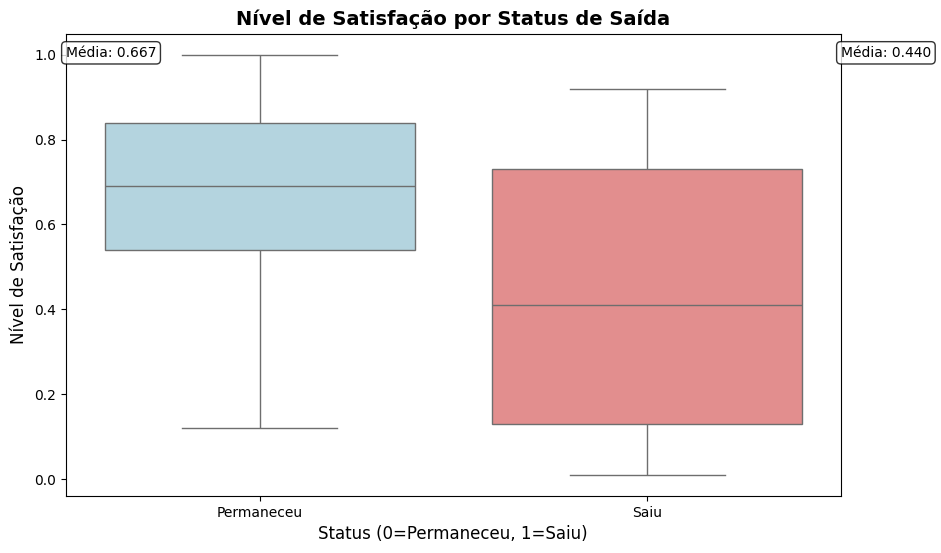

In [39]:
# Box plot comparando satisfação entre quem saiu e quem ficou
plt.figure(figsize=(10, 6))

sns.boxplot(data=original_df, 
            x='left', 
            y='satisfaction_level',
            palette=['lightblue', 'lightcoral'])

plt.title('Nível de Satisfação por Status de Saída', fontsize=14, fontweight='bold')
plt.xlabel('Status (0=Permaneceu, 1=Saiu)', fontsize=12)
plt.ylabel('Nível de Satisfação', fontsize=12)
plt.xticks([0, 1], ['Permaneceu', 'Saiu'])

# Adicionar estatísticas
permaneceu = original_df[original_df['left'] == 0]['satisfaction_level']
saiu = original_df[original_df['left'] == 1]['satisfaction_level']

plt.text(0, 0.95, f'Média: {permaneceu.mean():.3f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
         fontsize=10)
plt.text(1, 0.95, f'Média: {saiu.mean():.3f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
         fontsize=10)

plt.show()

/tmp/ipykernel_9698/3471720303.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=original_df,


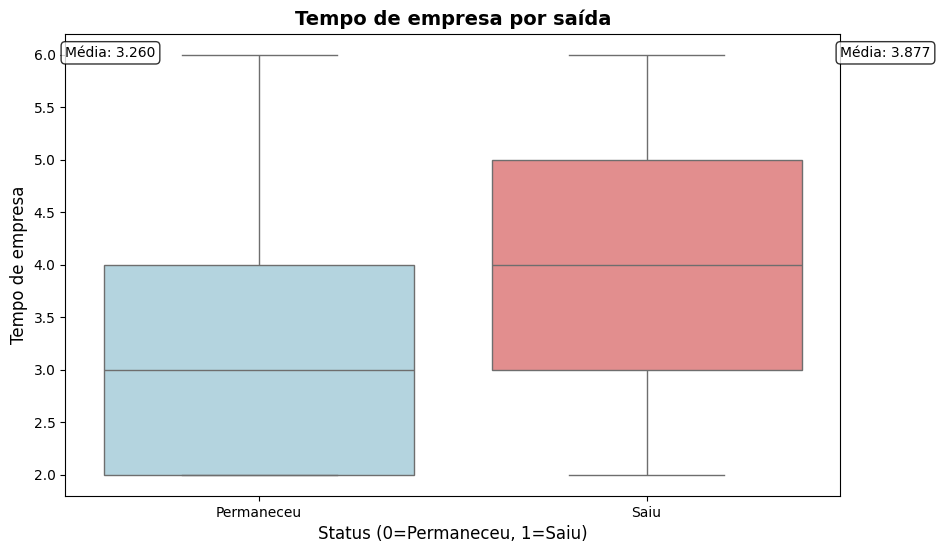

In [40]:
# Box plot comparando satisfação entre quem saiu e quem ficou
plt.figure(figsize=(10, 6))

sns.boxplot(data=original_df, 
            x='left', 
            y='time_spend_company',
            palette=['lightblue', 'lightcoral'])

plt.title('Tempo de empresa por saída', fontsize=14, fontweight='bold')
plt.xlabel('Status (0=Permaneceu, 1=Saiu)', fontsize=12)
plt.ylabel('Tempo de empresa', fontsize=12)
plt.xticks([0, 1], ['Permaneceu', 'Saiu'])

# Adicionar estatísticas
permaneceu = original_df[original_df['left'] == 0]['time_spend_company']
saiu = original_df[original_df['left'] == 1]['time_spend_company']

plt.text(0, 0.95, f'Média: {permaneceu.mean():.3f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
         fontsize=10)
plt.text(1, 0.95, f'Média: {saiu.mean():.3f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
         fontsize=10)

plt.show()

Com os gráficos acima, temos alguns insights interessantes.

A maior parte dos funcionários ficam na empresa até os 4 anos. Até os 3 anos, é onde começa a maior concentração de saída.

Vemos que a mediana da saida se encaixa com o gráfico de linha feito, onde a sua mediana está em 4. QUe é onde temos o ponto mais baixo de satisfação com a empresa.

Conseguimos ver que é uma empresa onde a média de tempo de casa das pessoas é relativamente baixa, 3.2 anos. E a média das pessoas que saem é de 3.8.

Vemos pelo boxplot que a saída da empresa se concentra entre 3 até 5 anos. Mostrando que esse é o ciclo critico para retenção do funcionário

Então, podemos ver que a empresa tem uma rotatividade relativamente alta, onde pessoas com mais de 3 anos de casa tendem a sair.

Vemos também que dentre as pessoas que saíram, temos uma nota média maior de satisfalção menor comparada com os que ficam.

Será que o tempo de trabalho mensal influencia em ter acidente de trabalho?

<Axes: xlabel='Work_accident', ylabel='average_montly_hours'>

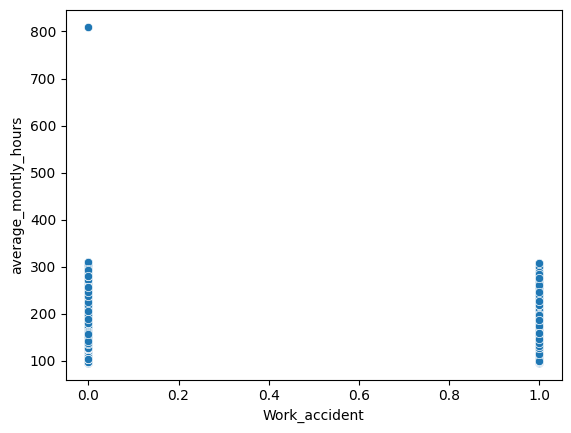

In [41]:
sns.scatterplot(original_df, x='Work_accident', y='average_montly_hours')

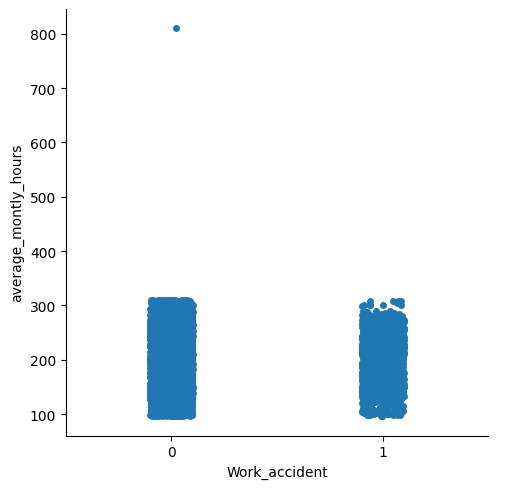

In [42]:

sns.catplot(original_df, x='Work_accident', y='average_montly_hours')

Nessa relação, não conseguimos ver uma relação ou alguma influencia, devido a termos horas de trabalho muito parecidas, de 100 até 300

<Axes: xlabel='num_project', ylabel='last_evaluation'>

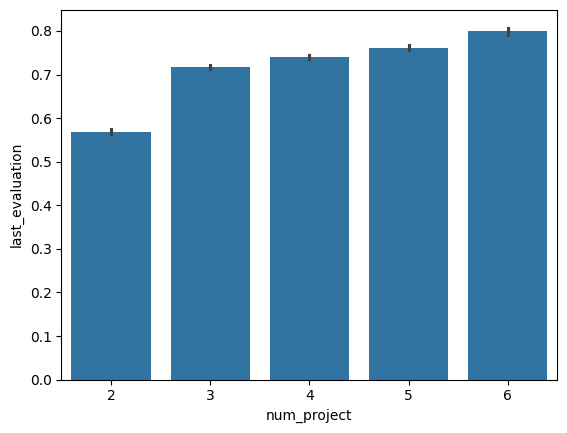

In [43]:
# numero de projetos que o funcionário atua tem relação com a avalição?

sns.barplot(original_df, x='num_project', y='last_evaluation')

In [44]:
#
px.violin(original_df, x='num_project', y='last_evaluation', box=True, points='all')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'box': {'visible': True},
              'hovertemplate': 'num_project=%{x}<br>last_evaluation=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'points': 'all',
              'scalegroup': 'True',
              'showlegend': False,
              'type': 'violin',
              'x': {'bdata': ('AgUGBQICBgUFAgIGBAICAgIEAgUGAg' ... 'QCBgUFAgUCBQQFAgIFBgIGAgICBgI='),
                    'dtype': 'i1'},
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('9ihcj8L14D+F61G4HoXrPylcj8L1KO' ... '/C9eA/uB6F61G47j+kcD0K16PgPw=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'violinmode': 'group',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'num_project'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'last_evaluation'}}}
})

In [45]:
# Como está a distribuição das promoções?
px.violin(original_df, x='num_project', y='last_evaluation', box=True, points='all', color='promotion_last_5years')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'box': {'visible': True},
              'hovertemplate': ('promotion_last_5years=0<br>num' ... 'evaluation=%{y}<extra></extra>'),
              'legendgroup': '0',
              'marker': {'color': '#636efa'},
              'name': '0',
              'offsetgroup': '0',
              'orientation': 'v',
              'points': 'all',
              'scalegroup': 'True',
              'showlegend': True,
              'type': 'violin',
              'x': {'bdata': ('AgUGBQICBgUFAgIGBAICAgIEBQYCBg' ... 'IGBQUCBQIFBAUCAgUGAgYCAgIGAg=='),
                    'dtype': 'i1'},
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('9ihcj8L14D+F61G4HoXrPylcj8L1KO' ... 'yPwvXgP7gehetRuO4/pHA9Ctej4D8='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'box': {'visible': True},
              'hovertemplate': ('promotion_last_5years=1<br>num' ... 'evaluation=%{y}<extra></extra>'),
              'legendgroup': '1',
              'marker': {'color': '#EF553B'},
              'name': '1',
              'offsetgroup': '1',
              'orientation': 'v',
              'points': 'all',
              'scalegroup': 'True',
              'showlegend': True,
              'type': 'violin',
              'x': {'bdata': ('AgQCBgICBAIFBAMDBQMDBQQEAwMEBA' ... 'IEBQQDAgMGAwMEAwMFAwMCBAIGAg=='),
                    'dtype': 'i1'},
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('UrgehetR4D/hehSuR+HiP3E9CtejcN' ... 'rXo3DdP0jhehSuR+k/7FG4HoXr4T8='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'promotion_last_5years'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'violinmode': 'group',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'num_project'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'last_evaluation'}}}
})

In [46]:
# TEmos incidencia de saída maior em funcionarios que tem mais projetos?
px.violin(original_df, x='num_project', y='last_evaluation', box=True, points='all', color='left')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'box': {'visible': True},
              'hovertemplate': 'left=1<br>num_project=%{x}<br>last_evaluation=%{y}<extra></extra>',
              'legendgroup': '1',
              'marker': {'color': '#636efa'},
              'name': '1',
              'offsetgroup': '1',
              'orientation': 'v',
              'points': 'all',
              'scalegroup': 'True',
              'showlegend': True,
              'type': 'violin',
              'x': {'bdata': ('AgUGBQICBgUFAgIGBAICAgIEAgUGAg' ... 'IGBQUCBQIFBAUCAgUGAgYCAgIGAg=='),
                    'dtype': 'i1'},
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('9ihcj8L14D+F61G4HoXrPylcj8L1KO' ... 'yPwvXgP7gehetRuO4/pHA9Ctej4D8='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'box': {'visible': True},
              'hovertemplate': 'left=0<br>num_project=%{x}<br>last_evaluation=%{y}<extra></extra>',
              'legendgroup': '0',
              'marker': {'color': '#EF553B'},
              'name': '0',
              'offsetgroup': '0',
              'orientation': 'v',
              'points': 'all',
              'scalegroup': 'True',
              'showlegend': True,
              'type': 'violin',
              'x': {'bdata': ('BAIFBQMDAgUGBAQCBQMDAwMGBAQFBQ' ... 'UEBAIFBAQFBAMDBAIDBAMDBQMDBA=='),
                    'dtype': 'i1'},
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('rkfhehSu5z9xPQrXo3DlPxSuR+F6FO' ... 'oUrkfhP83MzMzMzOQ/XI/C9Shc5z8='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'left'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'violinmode': 'group',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'num_project'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'last_evaluation'}}}
})

Vemos que, as pessoas que atuaram em mais projetos, tem uma avalição maior do que aqueles que atuaram em menos, como podemos ver claramente no gráfico de barras.

Conseguimos ver que conforme o numero de projetos vai aumentando temos um crescimento claro da avaliação.

Com dois projetos vemosavaliações mais baixas, com 3 e 4 temos avaliações medianas, com 5 temos avalições medianas e altas e com 6 predominantemente avaliações altas.

Vemos também cruzando os dados de saída que quando se tem 2 projetos, quem costuma sair tem uma avaliação baxa-média, com 3 é um dado bem diversificado, mas a partir de 4 projetos, vemos que as pessoas que saem tendem a ter notas de avaliações altas.

Isso pode indicar que temos um certo comportamento de necessidade de melhorar a retenção de talentos, já que aqueels com nota alta são os que mais saem e trabalharam em mais projetos. Ainda mais vendo que temos poucas promoções nos ultimos 5 anos.

Com essas análises conseguimos perceber que temos algumas relações entre as variáveis, como por exemplo a avaliação e o número de projetos. E também o tempo de empresa com a saída, onde percebemos que há um vale no quarto ano de empresa. 

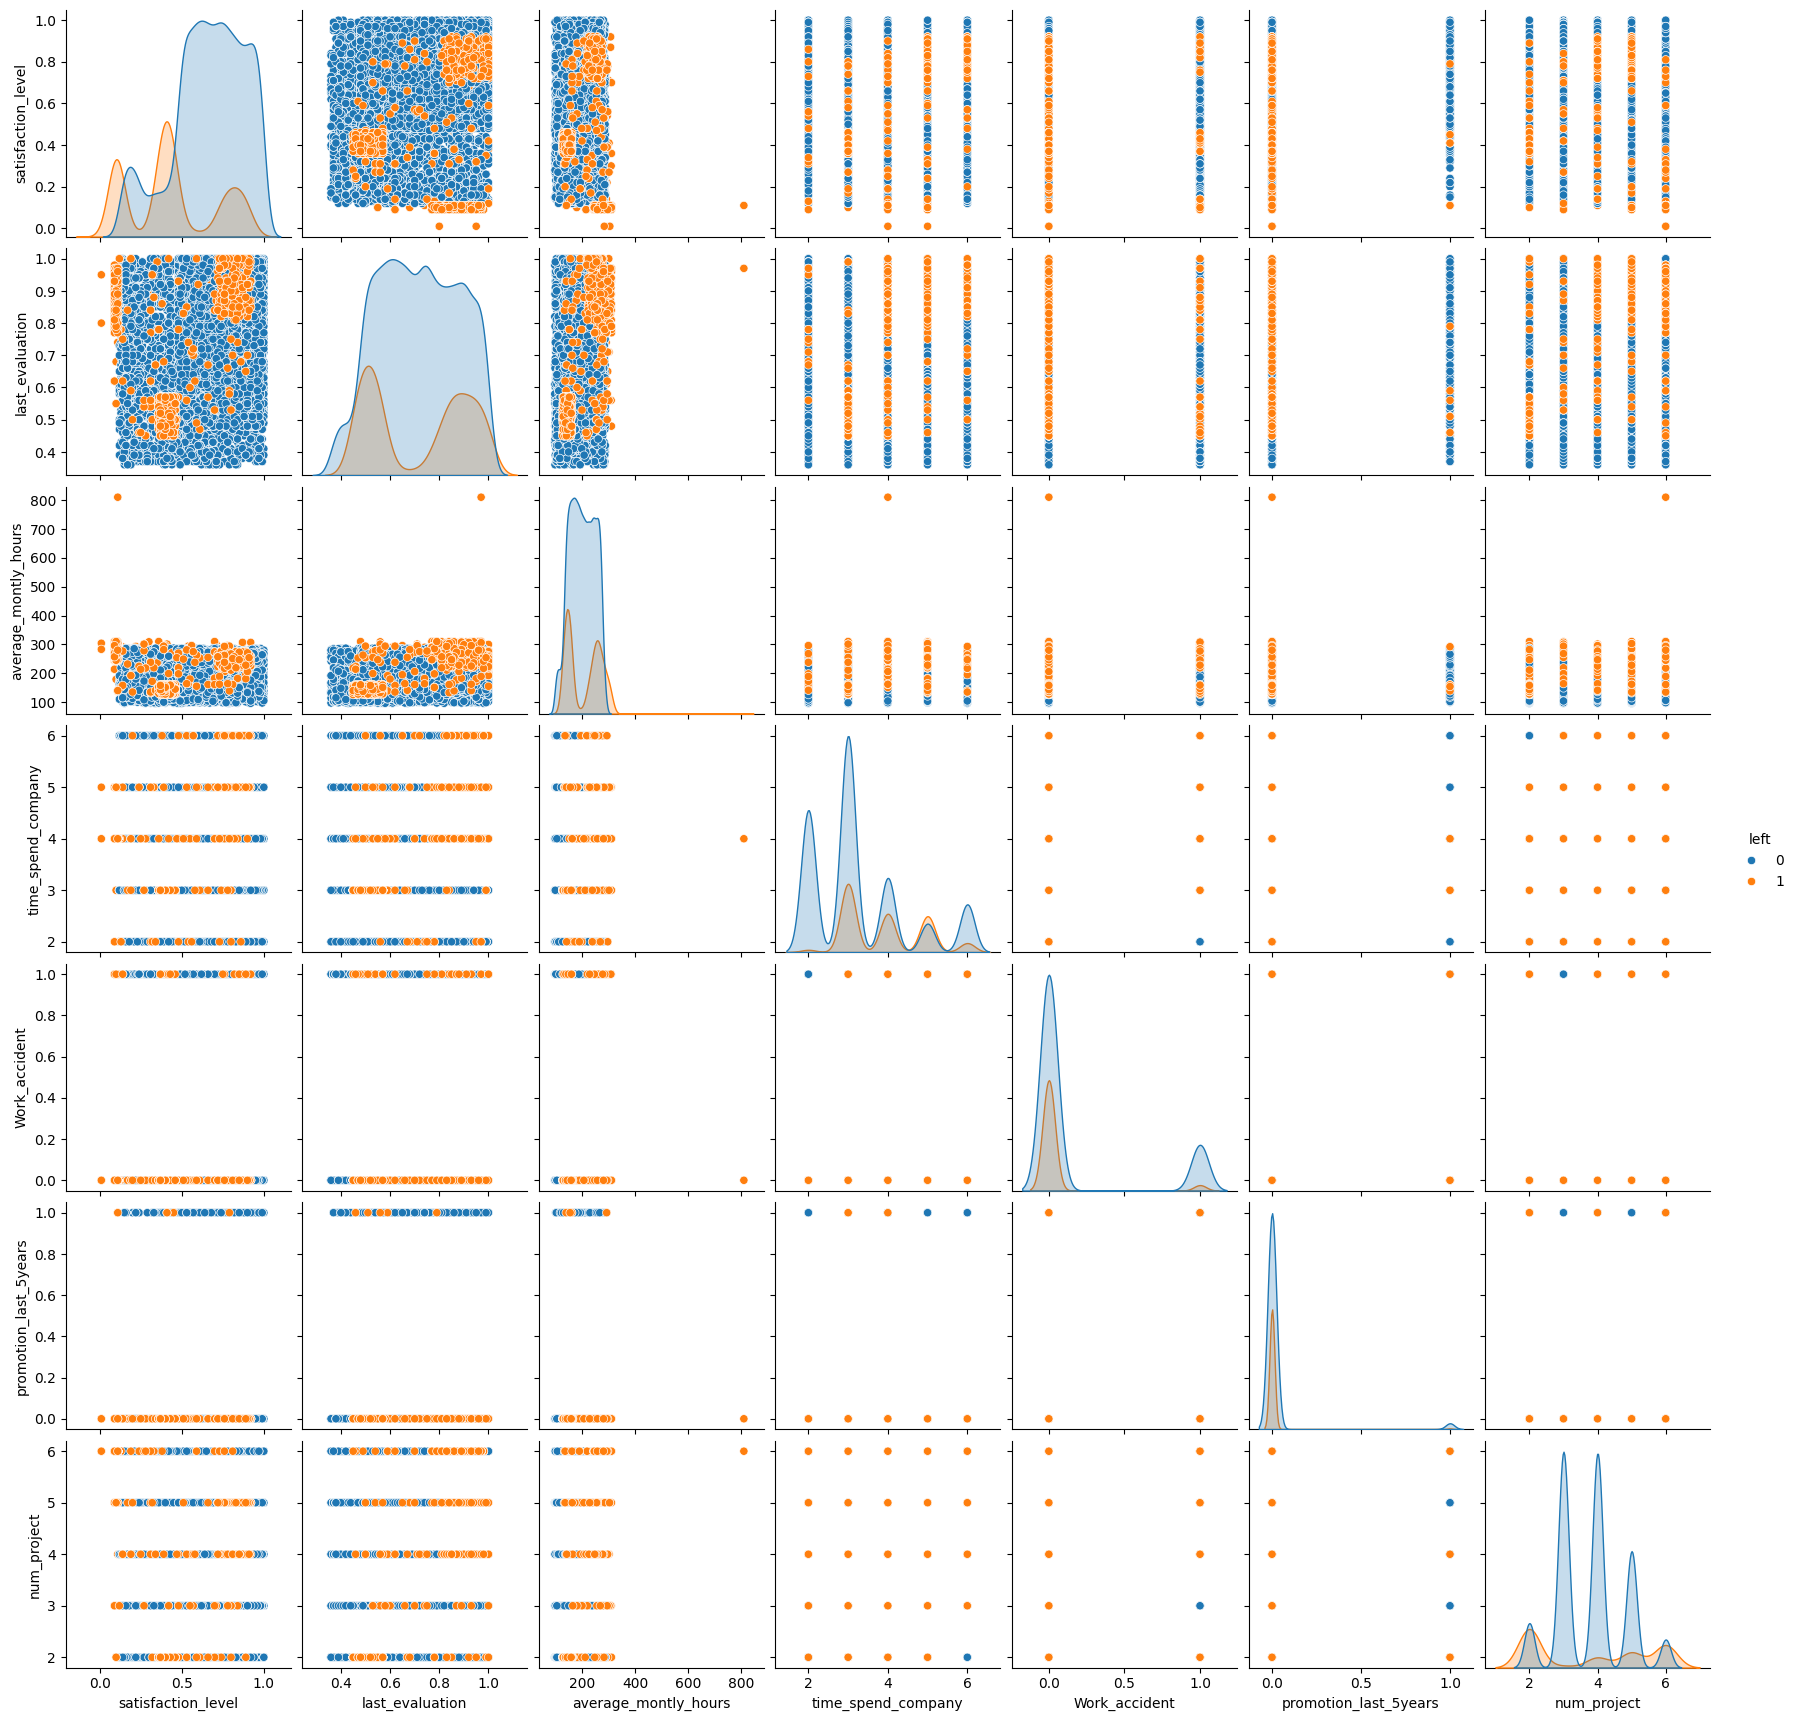

In [47]:
sns.pairplot(original_df, hue='left')

<Axes: xlabel='last_evaluation', ylabel='average_montly_hours'>

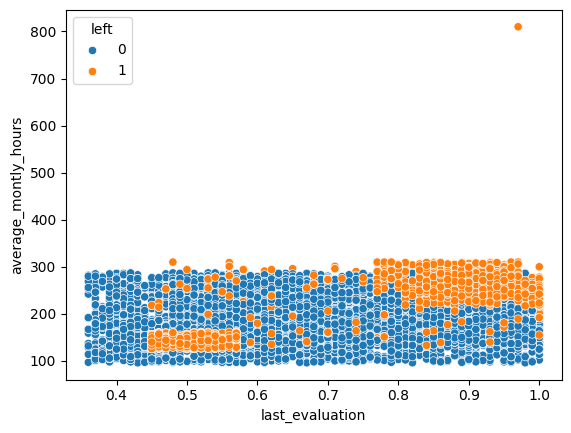

In [48]:
# vamos analisar melhor o grafico de avarage_monthly_hours e last evaluation com left

# quanto mais a avaliação e maior o trabalho por mes, mais chance do funcionario sair?
sns.scatterplot(original_df, y='average_montly_hours', x='last_evaluation', hue='left')

Vemos que além da qnt de projetos, temos também uma relação bem visivel com o tempo de trabalho mensal e a ultima avaliação. Quanto maior esses dois maior incidencia da saída. Unindo com o que temos de informação sobre quantidade de projetos, vemos que a empresa tem dificuldade de reter bons funcionários

<Axes: xlabel='salary', ylabel='satisfaction_level'>

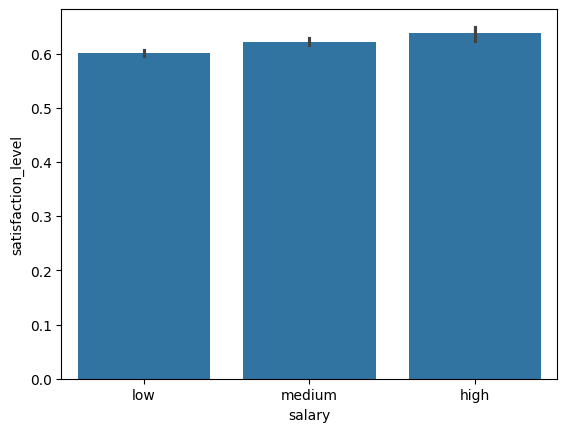

In [49]:
# qual o salário por notas de satisfação?

sns.barplot(original_df, x='salary', y='satisfaction_level')

<Axes: xlabel='salary', ylabel='satisfaction_level'>

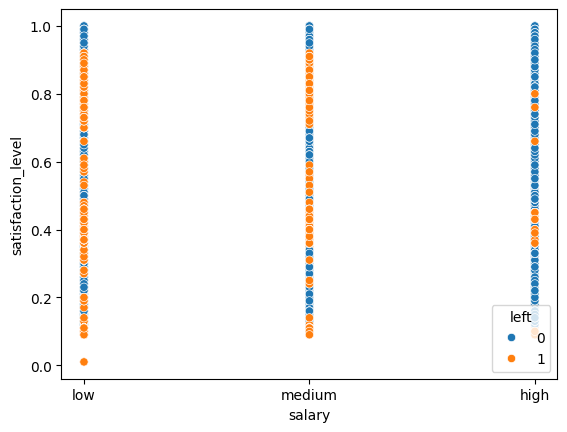

In [50]:
# quanto isso se relaciona com os dados de saída?

sns.scatterplot(original_df, x='salary', y='satisfaction_level', hue='left')

Podemos ver que nenhuma pessoa com satisfação a partir de 0.8 saiu da empresa, quando tem um salário alto. Vendo assim que podemos ter uma saída decorrente de falta de valorização salarial, ainda mais que temos baixos registros de promoção na base de dados

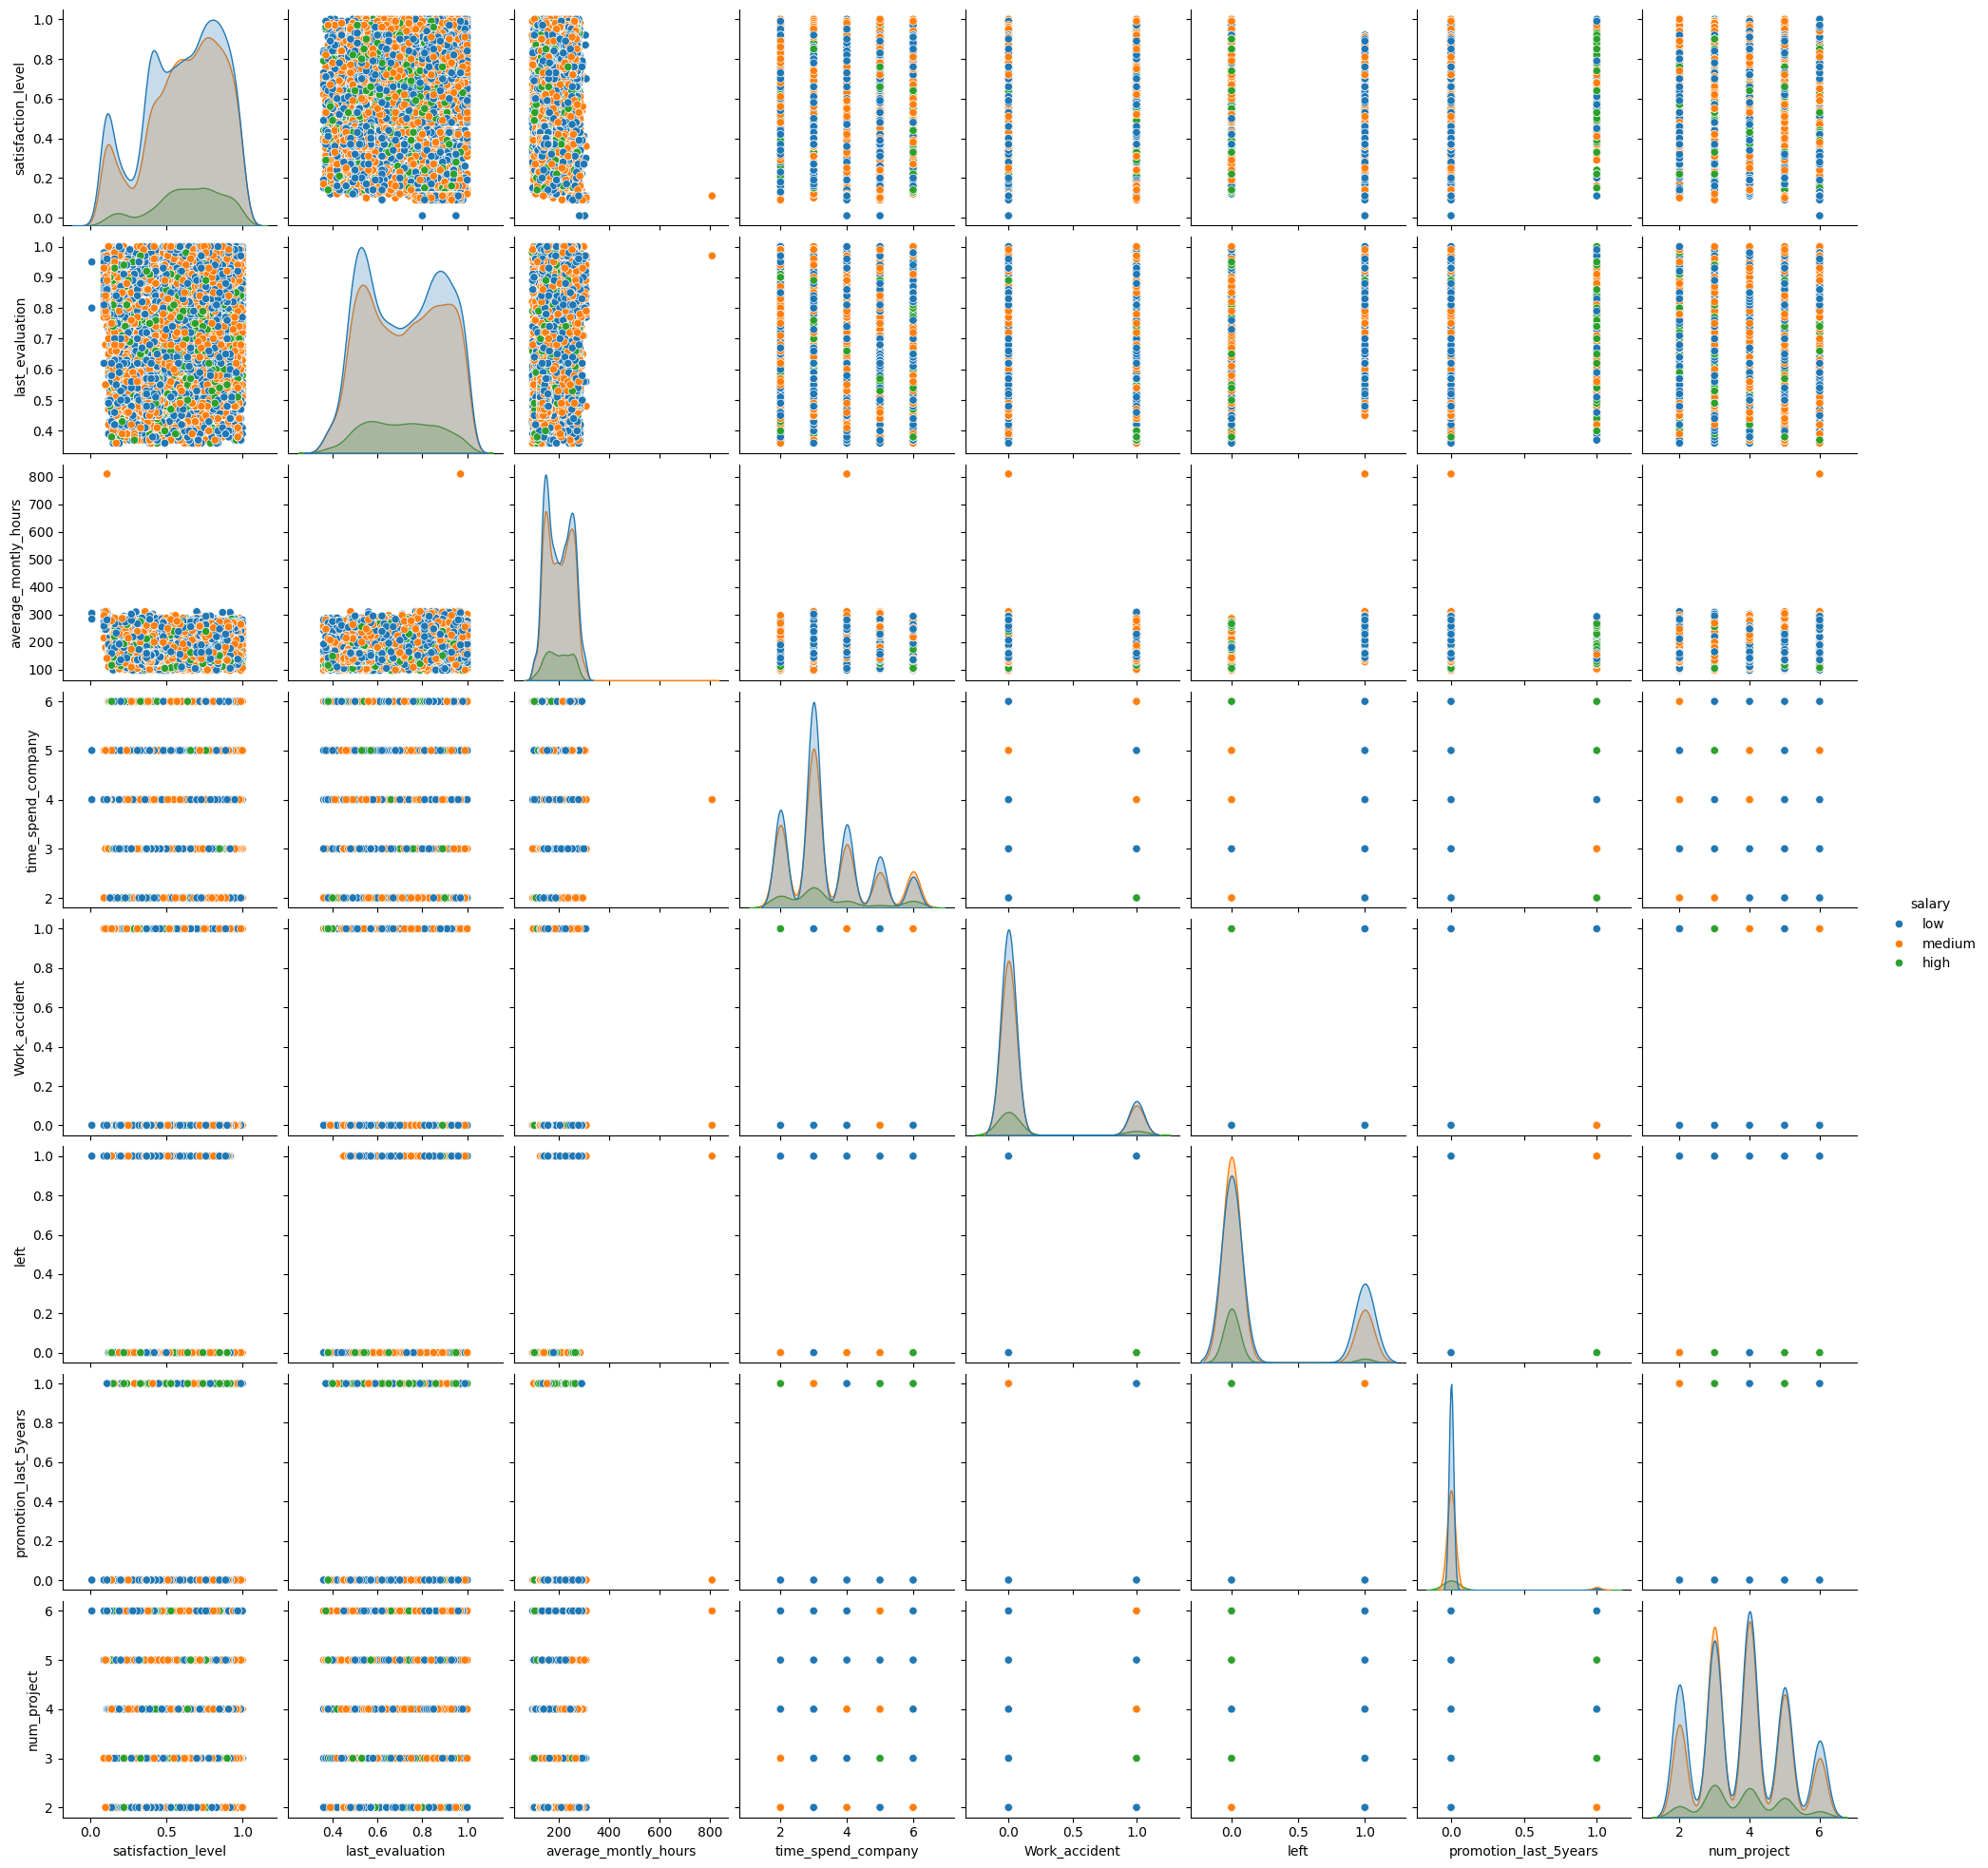

In [51]:
# temos alguma outra relação que o salário tem uma divisão clara?

sns.pairplot(original_df, hue='salary')


promotion_last_5years
0    1165
1      72
Name: salary, dtype: int64


<Axes: xlabel='promotion_last_5years', ylabel='salary'>

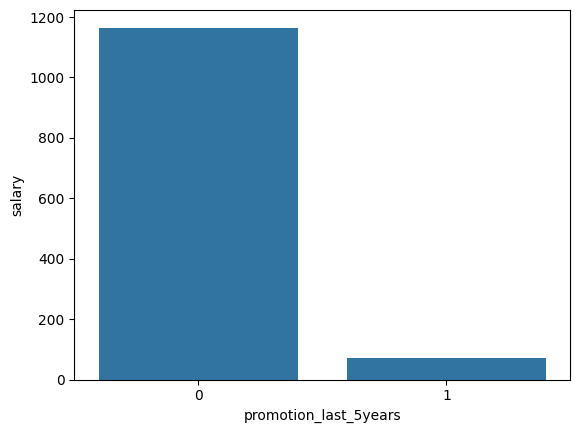

In [52]:
# Todos que tiveram promoções são classificados como salário alto?

high_salary = original_df[original_df['salary'] == 'high']

grouped_salary = high_salary.groupby('promotion_last_5years')['salary'].count()

print(grouped_salary)

sns.barplot(grouped_salary)

Nem todos as pessoas que tem salário alto receberam promoções.

<Axes: xlabel='salary', ylabel='salary'>

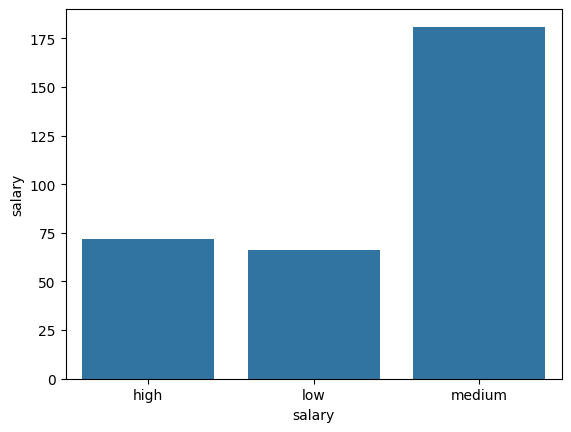

In [53]:
# todos que receberam promoção, tem salário alto?

promoted = original_df[original_df.promotion_last_5years == 1]

grouped_by_salary = promoted.groupby('salary')['salary'].count()

sns.barplot(grouped_by_salary)

Na verdade, vemos que a maior parte das pessoas que receberam promoção tem salário médio, e não alto.

salary       high   low  medium
depto                          
IT             83   609     535
RandD          51   364     372
accounting     74   358     335
hr             45   335     359
management    225   180     225
marketing      80   402     376
product_mng    68   451     383
sales         269  2099    1772
support       141  1146     942
technical     201  1372    1147


<Axes: xlabel='depto'>

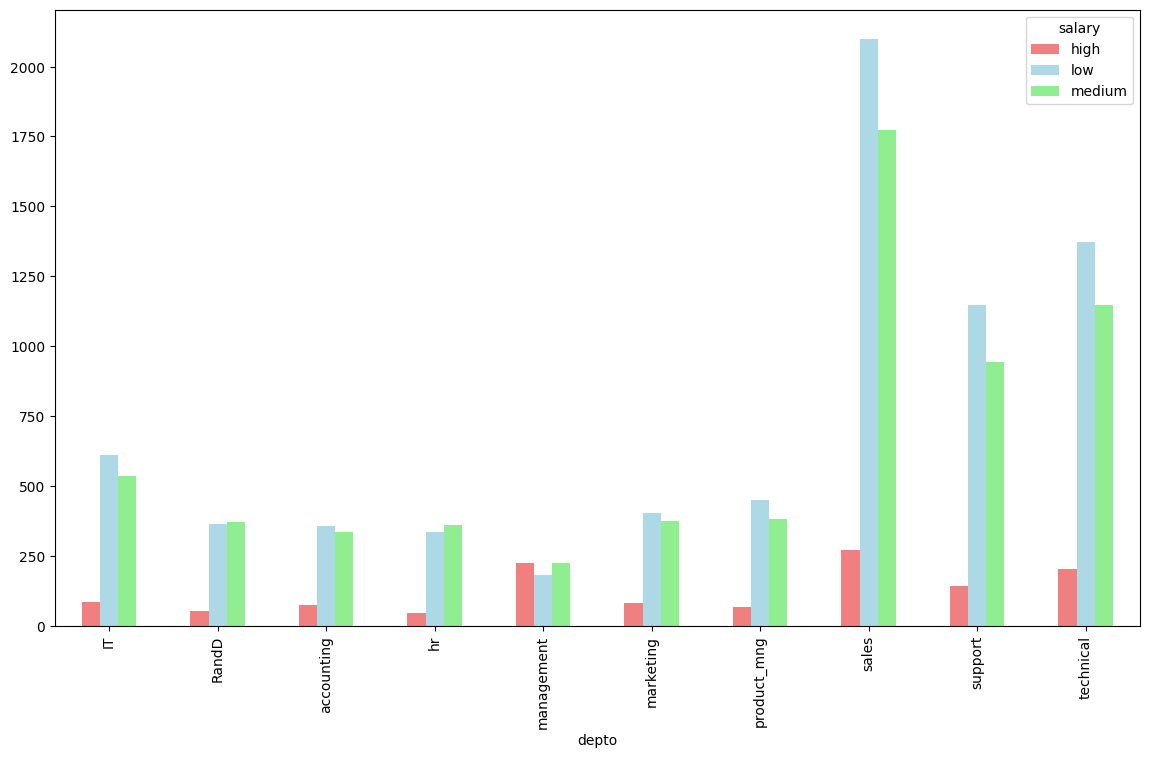

In [54]:
# Quais são os setores com mais salários altos

salary_dept_data = pd.crosstab(original_df['depto'], original_df['salary'])

print(salary_dept_data)
# Gráfico agrupado
salary_dept_data.plot(kind='bar', 
                      figsize=(14, 8),
                      color=['lightcoral', 'lightblue', 'lightgreen'])

Vemos que o departamento de vendas é o maior concentrador de salários altos, como os altos e médios também. Indicando que é o departamento com mais pessoas.

salary       high   low  medium
depto                          
IT             83   609     535
RandD          51   364     372
accounting     74   358     335
hr             45   335     359
management    225   180     225
marketing      80   402     376
product_mng    68   451     383
sales         269  2099    1772
support       141  1146     942
technical     201  1372    1147


<Axes: xlabel='depto'>

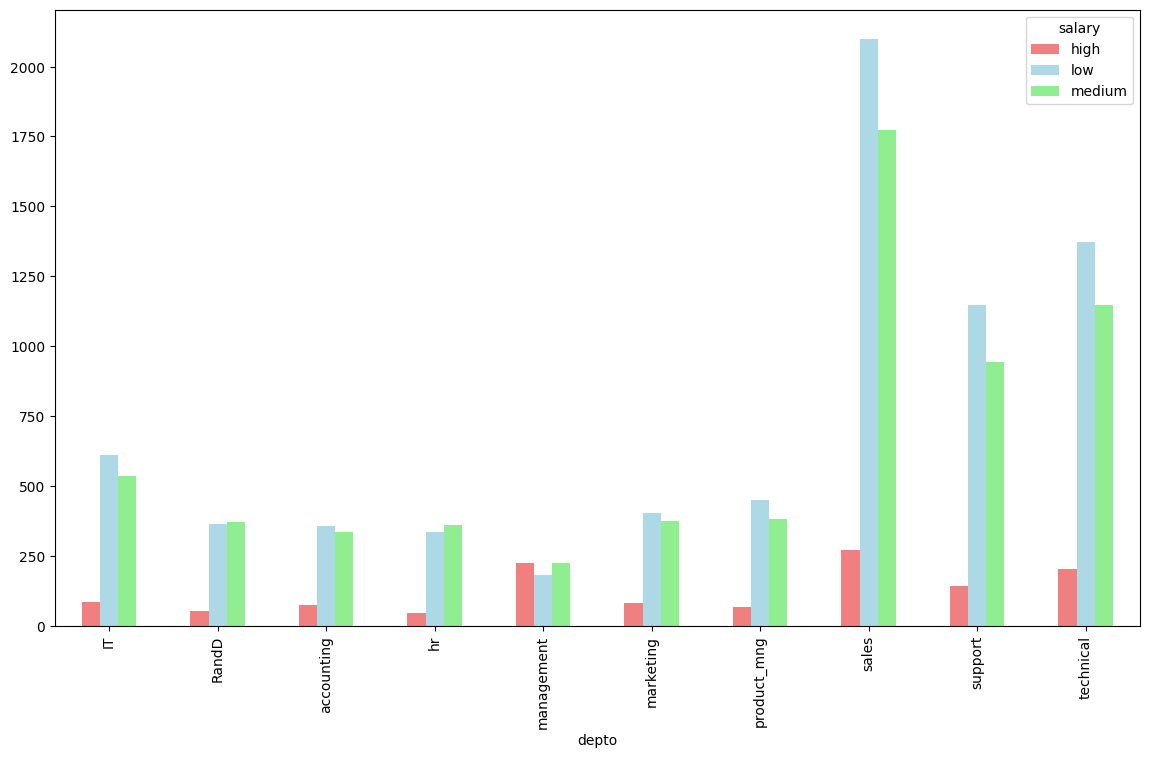

In [55]:
# será que temos relação do departamento com a saída de pessoas?

salary_dept_data = pd.crosstab(original_df['depto'], original_df['salary'])

print(salary_dept_data)
# Gráfico agrupado
salary_dept_data.plot(kind='bar',
                      figsize=(14, 8),
                      color=['lightcoral', 'lightblue', 'lightgreen'])

## Correlacionando os dados

Dados de satisfação, salário e campos levantaos anteriomente tem relação com a saída da empresa?

<Axes: >

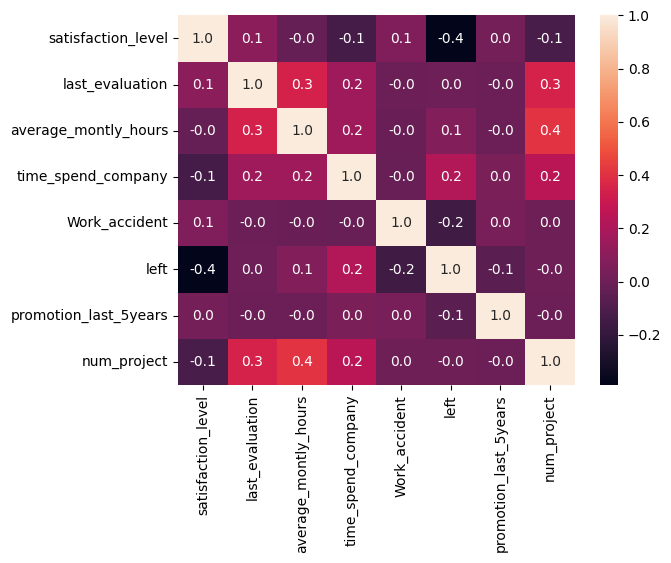

In [56]:
correlation_matrix = original_df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True, fmt=".1f")

Vemos que não temos uma variável que vemos que tem importância com a saída, que é o salário. Vamos precisar trata-la

In [57]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

In [58]:
salary_encoder = LabelEncoder()

df_salary_encoded = original_df.copy()

df_salary_encoded['salary'] = salary_encoder.fit_transform(original_df['salary'])

<Axes: >

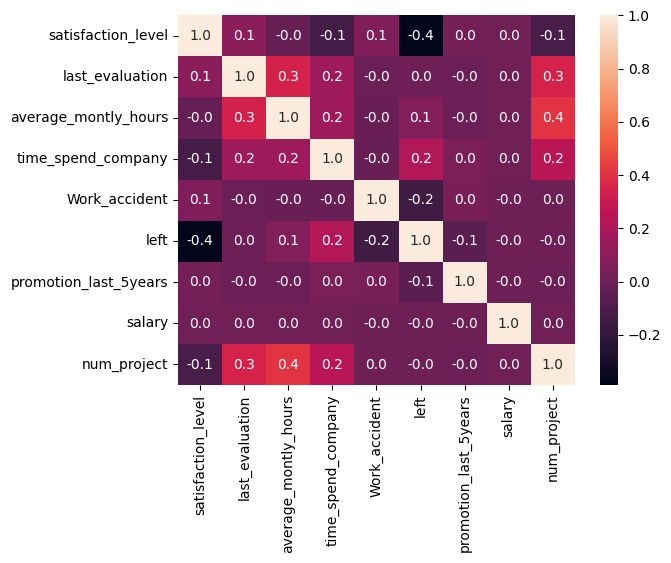

In [59]:
correlation_matrix = df_salary_encoded.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True, fmt=".1f")

In [60]:
df_salary_encoded.head()

satisfaction_level  last_evaluation  average_montly_hours  \
0                0.38             0.53                   157   
1                0.80             0.86                   262   
2                0.11             0.88                   272   
3                0.72             0.87                   223   
4                0.37             0.52                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  salary  \
0                   3              0     1                      0       1   
1                   6              0     1                      0       2   
2                   4              0     1                      0       2   
3                   5              0     1                      0       1   
4                   3              0     1                      0       1   

   num_project  depto  
0            2  sales  
1            5  sales  
2            6  sales  
3            5  sales  
4            2  sales

In [61]:
# validando correlação com one hot encoding
from sklearn.compose import ColumnTransformer

salary_one_hot_encoder = OneHotEncoder()
pipeline_one_hot_encoder = ColumnTransformer(transformers=[
    ('imputer', SimpleImputer(), original_df.select_dtypes('float64').keys()),
    ('imputer_int', SimpleImputer(), original_df.select_dtypes('int64').keys()),
    ('encoded', salary_one_hot_encoder, ['salary']),
], remainder='drop', verbose_feature_names_out=False)

result = pipeline_one_hot_encoder.fit_transform(original_df)

df_salary_encoded = pd.DataFrame(result, columns=pipeline_one_hot_encoder.get_feature_names_out())

<Axes: >

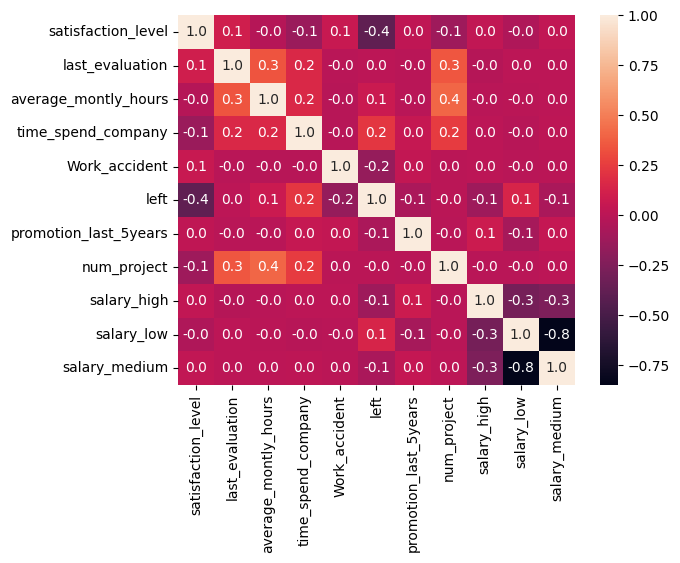

In [62]:
df_salary_encoded.head()

correlation_matrix = df_salary_encoded.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True, fmt=".1f")

In [63]:
df_salary_encoded.head()

satisfaction_level  last_evaluation  average_montly_hours  \
0                0.38             0.53                 157.0   
1                0.80             0.86                 262.0   
2                0.11             0.88                 272.0   
3                0.72             0.87                 223.0   
4                0.37             0.52                 159.0   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                 3.0            0.0   1.0                    0.0   
1                 6.0            0.0   1.0                    0.0   
2                 4.0            0.0   1.0                    0.0   
3                 5.0            0.0   1.0                    0.0   
4                 3.0            0.0   1.0                    0.0   

   num_project  salary_high  salary_low  salary_medium  
0          2.0          0.0         1.0            0.0  
1          5.0          0.0         0.0            1.0  
2          6.0          0.0         0.0            1.0  
3          5.0          0.0         1.0            0.0  
4          2.0          0.0         1.0            0.0

In [64]:
original_df.head()

satisfaction_level  last_evaluation  average_montly_hours  \
0                0.38             0.53                   157   
1                0.80             0.86                   262   
2                0.11             0.88                   272   
3                0.72             0.87                   223   
4                0.37             0.52                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  salary  \
0                   3              0     1                      0     low   
1                   6              0     1                      0  medium   
2                   4              0     1                      0  medium   
3                   5              0     1                      0     low   
4                   3              0     1                      0     low   

   num_project  depto  
0            2  sales  
1            5  sales  
2            6  sales  
3            5  sales  
4            2  sales

Um caso curioso é que a faixa salarial não tem uma correlação forte com a nossa variável target (left). Realmente pode ter sido somente o fato do satisfaction_level que faz a pessoa nao deixar a empresa

Outros pontos que vemos é que algumas colunas observadas no descobrimento satisfaction_level realmente tem um valor relevante de correlação.

Outra coluna seria o valor de tempo de companhia, onde mapeamos que ele também era um ponto onde fazia certas pessoas deixarem a empresa, como é o caso do vale de 4 anos observado no gráfico de linha.

Um ponto que parecia não estar tão correlacionado assim, e o gráfico de heatmap mostra que tem algo relevante é o acidente de trabalho. Inicialmente parecia estar bem distribuido na base de pessoas que sairam da empresa, porém, parece ser um fator determinante para a saida

## Problema

Identificar de forma antecipada qual funcionário irá sair. Com isso, conseguimos tomar ações preventivas para retenção de talento.

Iremos utilizar um modelo de aprendizado supervisionado para a resolução do problema

In [65]:
# Vamos extrair as colunas com mais correlação.
y = original_df['left']
x = original_df[[
    'satisfaction_level',
    'average_montly_hours',
    'time_spend_company',
    'Work_accident',
    ]]


In [66]:
from sklearn.model_selection import train_test_split


x.head()

satisfaction_level  average_montly_hours  time_spend_company  Work_accident
0                0.38                   157                   3              0
1                0.80                   262                   6              0
2                0.11                   272                   4              0
3                0.72                   223                   5              0
4                0.37                   159                   3              0

In [67]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42, test_size=0.2)

In [68]:
# Escalando os dados
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

In [69]:
# Configurando o pipeline

scaler_pipeline = ColumnTransformer([
    ('scaler', RobustScaler(), ['satisfaction_level', 'average_montly_hours', 'time_spend_company', 'Work_accident'])
])

x_train_scaled = scaler_pipeline.fit_transform(x_train)

In [70]:
print(x_train_scaled)

[[ 0.23684211  0.52808989  1.          0.        ]
 [ 0.36842105  0.40449438  2.          0.        ]
 [-1.42105263  0.52808989  1.          0.        ]
 ...
 [-1.42105263  1.2247191   1.          0.        ]
 [-0.15789474 -0.28089888  0.          1.        ]
 [-1.39473684  0.98876404  1.          0.        ]]


In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [72]:
randomForest = RandomForestClassifier()

kfold  = KFold(n_splits=5, shuffle=True) # shuffle=True, Shuffle (embaralhar) os dados.
result = cross_val_score(randomForest, x_train_scaled, y_train, cv = kfold)

print("K-Fold (R^2) Scores: {0}".format(result))
print("Mean R^2 for Cross-Validation K-Fold: {0}".format(result.mean()))

K-Fold (R^2) Scores: [0.97875    0.97583333 0.97458333 0.97916667 0.98499375]
Mean R^2 for Cross-Validation K-Fold: 0.9786654161456163


In [73]:
knn_param_grid = {'n_neighbors': range(8,14), #total de vizinhos
              'weights': ['uniform', 'distance'], #Função de peso usada na previsão
              'metric':['cosine', 'euclidean', 'manhattan'] #métrica para cálculo da distância
             }

grid_knn = GridSearchCV(KNeighborsClassifier(),
                    param_grid=knn_param_grid,
                    scoring='f1',
                    cv=5, n_jobs=4, verbose=3
                    )

grid_knn.fit(x_train_scaled, y_train) #Selecionando os melhores hiperparametros com base nos dados de treino
knn_params = grid_knn.best_params_
print('KNN', knn_params)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 2/5] END metric=cosine, n_neighbors=8, weights=uniform;, score=0.865 total time=   1.8s
[CV 3/5] END metric=cosine, n_neighbors=8, weights=uniform;, score=0.855 total time=   1.9s
[CV 4/5] END metric=cosine, n_neighbors=8, weights=uniform;, score=0.860 total time=   2.0s
[CV 1/5] END metric=cosine, n_neighbors=8, weights=uniform;, score=0.865 total time=   1.5s
[CV 5/5] END metric=cosine, n_neighbors=8, weights=uniform;, score=0.877 total time=   1.6s
[CV 1/5] END metric=cosine, n_neighbors=8, weights=distance;, score=0.898 total time=   1.6s
[CV 2/5] END metric=cosine, n_neighbors=8, weights=distance;, score=0.881 total time=   1.6s
[CV 3/5] END metric=cosine, n_neighbors=8, weights=distance;, score=0.882 total time=   1.5s
[CV 4/5] END metric=cosine, n_neighbors=8, weights=distance;, score=0.882 total time=   1.7s
[CV 1/5] END metric=cosine, n_neighbors=9, weights=uniform;, score=0.876 total time=   1.7s
[CV 5/5] END m

In [74]:
random_forest_params = {
    'n_estimators': range(1,15),
    'max_depth': range(1,20),
    'criterion': ['gini', 'entropy', 'log_loss']
}

grid_forest = GridSearchCV(RandomForestClassifier(),
                    param_grid=random_forest_params,
                    scoring='f1',
                    cv=5, n_jobs=4, verbose=3
                    )

grid_forest.fit(x_train_scaled, y_train) #Selecionando os melhores hiperparametros com base nos dados de treino
random_forest_params = grid_forest.best_params_
print('RANDOM FOREST', random_forest_params)

Fitting 5 folds for each of 798 candidates, totalling 3990 fits
[CV 1/5] END criterion=gini, max_depth=1, n_estimators=1;, score=0.620 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, n_estimators=1;, score=0.655 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, n_estimators=1;, score=0.653 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, n_estimators=1;, score=0.231 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, n_estimators=1;, score=0.163 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, n_estimators=2;, score=0.620 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, n_estimators=2;, score=0.000 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, n_estimators=2;, score=0.655 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, n_estimators=2;, score=0.658 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, n_estimators=3;, score=0.155 total time=   0.0s
[CV 5/5] END criterion=gini, max_dep

[CV 3/5] END criterion=gini, max_depth=8, n_estimators=6;, score=0.934 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=8, n_estimators=5;, score=0.932 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=8, n_estimators=7;, score=0.928 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=8, n_estimators=5;, score=0.933 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=8, n_estimators=6;, score=0.932 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=8, n_estimators=6;, score=0.929 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=8, n_estimators=7;, score=0.937 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=8, n_estimators=7;, score=0.941 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=8, n_estimators=6;, score=0.937 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=8, n_estimators=7;, score=0.934 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=8, n_estimators=8;, score=0.929 total time=   0.1s
[CV 1/5] E

In [75]:
svm_params = {
    'C': range(1,4),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': range(1,3),
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(SVC(),
                    param_grid=svm_params,
                    scoring='f1',
                    cv=5, n_jobs=4, verbose=3
                    )

grid_svm.fit(x_train_scaled, y_train) #Selecionando os melhores hiperparametros com base nos dados de treino
svm_params = grid_svm.best_params_
print('RANDOM FOREST', svm_params)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[CV 4/5] END C=1, degree=1, gamma=scale, kernel=linear;, score=0.000 total time=   2.7s
[CV 2/5] END C=1, degree=1, gamma=scale, kernel=linear;, score=0.000 total time=   2.7s
[CV 1/5] END C=1, degree=1, gamma=scale, kernel=linear;, score=0.327 total time=   3.2s
[CV 3/5] END C=1, degree=1, gamma=scale, kernel=linear;, score=0.000 total time=   3.7s
[CV 1/5] END C=1, degree=1, gamma=scale, kernel=poly;, score=0.329 total time=   2.1s
[CV 5/5] END C=1, degree=1, gamma=scale, kernel=linear;, score=0.000 total time=   2.4s
[CV 2/5] END C=1, degree=1, gamma=scale, kernel=poly;, score=0.000 total time=   2.4s
[CV 3/5] END C=1, degree=1, gamma=scale, kernel=poly;, score=0.000 total time=   2.5s
[CV 1/5] END C=1, degree=1, gamma=scale, kernel=rbf;, score=0.868 total time=   0.7s
[CV 2/5] END C=1, degree=1, gamma=scale, kernel=rbf;, score=0.876 total time=   0.7s
[CV 3/5] END C=1, degree=1, gamma=scale, kernel=rbf;, score=0.859 total time=   0.7s
[CV 5/5] END C=1, degree=1, gamma=scale, kernel

In [76]:
def cross_validation_models (x, y):
    random_forest_local = RandomForestClassifier(criterion='gini', max_depth=17, n_estimators=14)
    knn = KNeighborsClassifier(metric='euclidean', n_neighbors=11, weights='distance')
    svc = SVC(C=3, degree=1, gamma='scale', kernel='rbf')

    kfold  = KFold(n_splits=5, shuffle=True) # shuffle=True, Shuffle (embaralhar) os dados.
    result_random_forest = cross_val_score(random_forest_local, x, y, cv = kfold)
    result_knn = cross_val_score(knn, x, y, cv = kfold)
    result_svc = cross_val_score(svc, x, y, cv = kfold)

    dic_models = {
        "RF": result_random_forest.mean(),
        "KNN": result_knn.mean(),
        "SVC": result_svc.mean()
    }
    # Select the best model.
    melhorModelo = max(dic_models, key=dic_models.get)

    print("KNN (R^2): {0}\nSVM (R^2): {1}\nRandom Forest (R^2): {2}".format(result_knn.mean(), result_svc.mean(), result_random_forest.mean()))
    print("O melhor modelo é : {0} com o valor: {1}".format(melhorModelo, dic_models[melhorModelo]))


In [77]:
cross_validation_models(x_train_scaled, y_train)

KNN (R^2): 0.9726647561483951
SVM (R^2): 0.942578435459219
Random Forest (R^2): 0.9752474642212032
O melhor modelo é : RF com o valor: 0.9752474642212032


Fazendo o método de gridSearch e a validação cruzada.

Foi feio o gridSearch para determinar, dentro os parametros escolhidos, quais seriam os mais indicados para cada modelo.

Após isso, foi executado a validação utilizando o método de kfold, onde separo uma etapa para validação em cada iteração, fazendo com que consigamos entender o melhor modelo para o problema.

Utilizando essas métricas, o modelo escolhido foi o de randomForest, com o r2 de 0.97

## Treinamento e avaliação do modelo

In [78]:
# Treinando o modelo escolhido

final_model = RandomForestClassifier(criterion='gini', max_depth=17, n_estimators=14)

final_model.fit(x_train_scaled, y_train)

RandomForestClassifier(max_depth=17, n_estimators=14)

In [79]:
# Predição

x_scaled_test = scaler_pipeline.transform(x_test)
y_pred = final_model.predict(x_scaled_test)

In [83]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2286
           1       0.95      0.95      0.95       714

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



In [81]:
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.9756666666666667

In [ ]:
y_prob = final_model.predict_proba(x_scaled_test)[:,1]
y_prob

array([0.       , 0.       , 0.       , ..., 0.       , 0.       ,
       0.0026482], shape=(3000,))

In [85]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9811923019426494

Por fim, obtivemos uma acurácia de 97.6%.

Tivemos também, precision de 97%, recall de 97% e f1 score 97%. Houve um aumento de 1% dos resultados com peso.

## Conclusão

Obtivemos um resultado significativamente bom para a previsão de churn de funcionários, baseados nos dados fornecidos pela empresa. 

Ele pode ser um bom guia para determinar quais funcionários demandam mais atenção, e saber quando fazer investimentos para reter talentos, ou verificar que aquele funcionário tem a possibilidade de sair.

Tem que ser utilizado com cautela, principalmente conjuntamente com boas práticas de RH